# Analyzer of Stocks


## Libraries


In [1]:
# Import necessary libraries
from dotenv import load_dotenv
from libs import indicators
import alpaca_trade_api as trade_api
import os
import pandas as pd
import matplotlib.pyplot as plt


## Alpaca Connection


In [2]:
load_dotenv()


True

In [3]:
# Get keys and URL for Alpaca API
alpaca_key = os.getenv('APCA_API_KEY_ID')
alpaca_secret_key = os.getenv('APCA_API_SECRET_KEY')
alpaca_paper_trade_url = os.getenv('APCA_API_PAPER_URL')


In [4]:
# Instantiate Alpaca connection
alpaca = trade_api.REST(alpaca_key, alpaca_secret_key, base_url=alpaca_paper_trade_url)


In [5]:
# Default parameters
ticker = 'TWOU'

today = pd.Timestamp('today')
today_date = f'{today:%Y-%m-%d}'

start_date = pd.Timestamp('2018-01-01', tz='America/New_York').isoformat()

end_date = pd.Timestamp(today_date, tz='America/New_York').isoformat()

timeframe = '1D'


In [6]:
# Get dataframe of ticker data
df_ohlcv_original = alpaca.get_barset(ticker, timeframe, start=start_date, end=end_date).df

# Copy of original dataframe
df_ohlcv = df_ohlcv_original[ticker].copy()


## Bollinger Bands


In [7]:
# Generate Bollinger Band data
df_updated = indicators.bollinger_band_generator(df_ohlcv)


## Keltner Channels


In [8]:
# Generate average true range values
df_updated = indicators.keltner_channel_generator(df_updated)


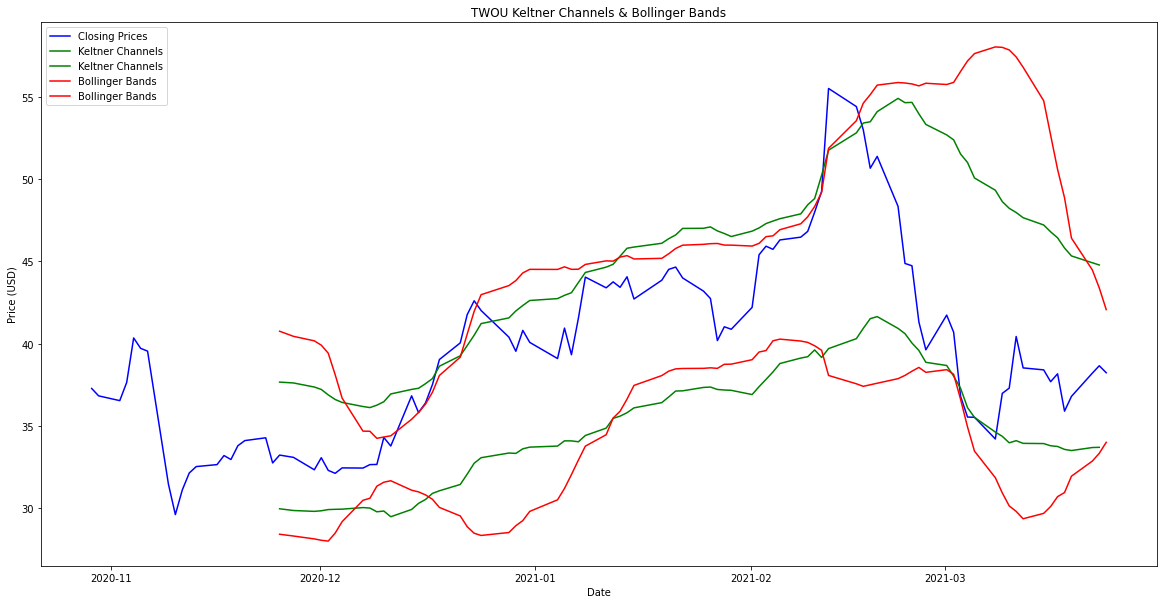

In [9]:
# Generate Keltner Channels and Bollinger Bands plot
plt.figure(figsize=(20,10))
plt.title(f'{ticker} Keltner Channels & Bollinger Bands')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.plot(df_updated[['close']], color='b', label='Closing Prices')
plt.plot(df_updated[['kc_upper', 'kc_lower']], color="g", label='Keltner Channels')
plt.plot(df_updated[['bb_upper', 'bb_lower']], color="r", label='Bollinger Bands')
plt.legend(loc='upper left')
